In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

[]

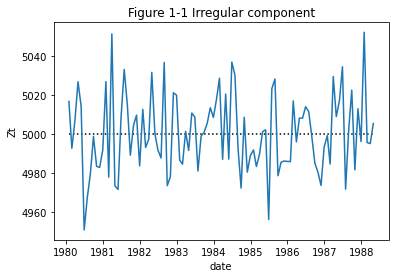

In [2]:
# figure 1-1
np.random.seed(1245)
n = 100
z = 5000 + 20 * np.random.randn(n)
z_ts = pd.DataFrame(z,
    index=pd.date_range("1980-01-01", periods=n, freq="M"),
    columns=["Zt"]
)
plt.plot(z_ts['Zt'])
plt.hlines(5000, z_ts.index[0], z_ts.index[-1], color='black', ls=":")
plt.xlabel("date")
plt.ylabel("Zt")
plt.title("Figure 1-1 Irregular component")
plt.plot()

[]

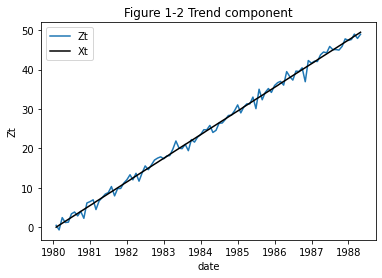

In [3]:
# figure 1-2
np.random.seed(1234)
n = 100
t = np.array(range(n))
x = 0.5 * t 
z = 0.5 * t + np.random.randn(n)

z_ts = pd.DataFrame(np.vstack([z, x]).T,
    index=pd.date_range("1980-01-01", periods=n, freq="M"),
    columns=["Zt", "Xt"]
)

plt.plot(z_ts['Zt'], label="Zt")
plt.plot(z_ts['Xt'], color="black", label="Xt")
plt.xlabel("date")
plt.ylabel("Zt")
plt.title("Figure 1-2 Trend component")
plt.legend()
plt.plot()

[]

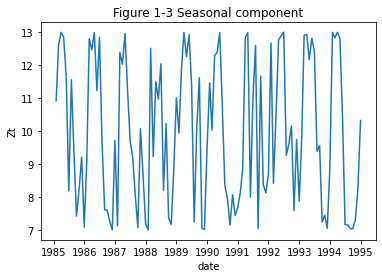

In [4]:
# figure 1-3
n = 120
t = np.array(range(n))
a = np.random.randn(n) + 0.1
z = 10 + 3 * np.sin((2 * math.pi * t) / 12 + 0.8 * a)
z_ts = pd.DataFrame(z,
    index=pd.date_range("1985-01-01", periods=n, freq="M"),
    columns=["Zt"]
)
plt.plot(z_ts['Zt'])
plt.xlabel("date")
plt.ylabel("Zt")
plt.title("Figure 1-3 Seasonal component")
plt.plot()

[]

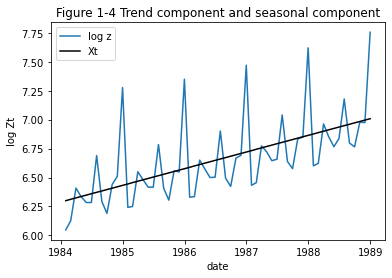

In [5]:
# figure 1-4
z = []

with open('../data/depart.txt') as f:
    for line in f.readlines():
        for elem in line.rstrip().split(" "):
            if len(elem):
                z.append(float(elem))
                
z = np.array(z)
lz = np.log(z)
t = np.array(range(len(z)))
x = 6.3 + 0.012 * t

z_ts = pd.DataFrame(np.vstack([lz, x]).T,
    index=pd.date_range("1984-01-01", periods=len(z), freq="M"),
    columns=["Zt", "Xt"]
)

plt.plot(z_ts['Zt'], label="log z")
plt.plot(z_ts['Xt'], color="black", label="Xt")
plt.xlabel("date")
plt.ylabel("log Zt")
plt.title("Figure 1-4 Trend component and seasonal component")
plt.legend()
plt.plot()

[]

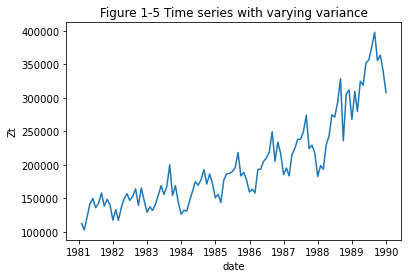

In [6]:
# figure 1-5
z = []

with open('../data/koreapass.txt') as f:
    for line in f.readlines():
        for elem in line.rstrip().split(" "):
            if len(elem):
                z.append(float(elem))
                
z = np.array(z)

z_ts = pd.DataFrame(z,
    index=pd.date_range("1981-01-01", periods=len(z), freq="M"),
    columns=["Zt"]
)

plt.plot(z_ts['Zt'])
plt.title("Figure 1-5 Time series with varying variance")
plt.xlabel("date")
plt.ylabel("Zt")
plt.plot()

[]

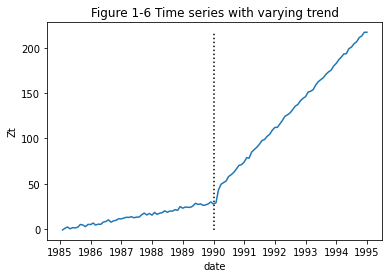

In [7]:
# figure 1-6
np.random.seed(4321)
n = 120
t = np.array(range(n))
a = np.random.randn(n)
x = 3 * (t - 46)
x[t <= 60] = 0.5 * t[t <= 60]
z = x + a

z_ts = pd.DataFrame(z,
    index=pd.date_range("1985-01-01", periods=n, freq="M"),
    columns=["Zt"]
)
plt.plot(z_ts['Zt'])
plt.xlabel("date")
plt.ylabel("Zt")
plt.title("Figure 1-6 Time series with varying trend")
plt.vlines(pd.to_datetime("1990-01"), z.min(), z.max(), color="black", ls=':')
plt.plot()

Mean: 99.9825	Var: 1.0486
Mean: 499.9094	Var: 0.8838
Mean: 110.8634	Var: 12567.6579
Mean: 101.5565	Var: 3007.3595


[]

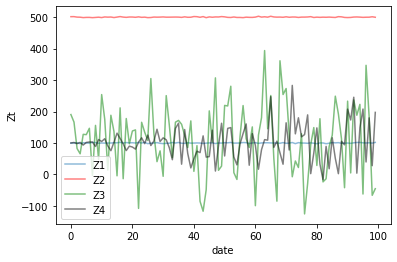

In [8]:
# Ex 1-5
n = 100
t = np.array(range(n))

z1 = 100 + np.random.randn(n)
z2 = 500 + np.random.randn(n)
z3 = 100 + 100 * np.random.randn(n)
z4 = 100 + t * np.random.randn(n)

z_ts = pd.DataFrame(np.vstack([z1, z2, z3, z4]).T,
    columns=["Z1", "Z2", "Z3", "Z4"]
)

for elem in [z1, z2, z3, z4]:
    mean = np.mean(elem).round(4)
    var = np.var(elem).round(4)
    print(f"Mean: {mean}\tVar: {var}")


plt.plot(z_ts['Z1'], label="Z1", alpha=0.5)
plt.plot(z_ts['Z2'], label="Z2", color="red", alpha=0.5)
plt.plot(z_ts['Z3'], label="Z3", color="green", alpha=0.5)
plt.plot(z_ts['Z4'], label="Z4", color="black", alpha=0.5)
plt.xlabel("date")
plt.ylabel("Zt")
plt.legend()
plt.plot()

In [9]:
# Ex 1-6
n = 100
t = np.array(range(n))

z1 = 100 + np.random.randn(n)
z2 = 100 + t + np.random.randn(n)
z3 = 100 + t + 2 * t**2 + np.random.randn(n)
z4 = 100 + np.sin((2 * math.pi * t) / 12) + np.cos((2 * math.pi * t) / 12) + np.random.randn(n)
z5 = 100 + np.sin((2 * math.pi * t) / 4) + np.cos((2 * math.pi * t) / 4) + np.random.randn(n)
z6 = 100 + 0.3 * t + np.sin((2 * math.pi * t) / 12) + np.cos((2 * math.pi * t) / 12) + np.random.randn(n)
z7 = 100 + np.sin((2 * math.pi * t) / 12) + np.cos((2 * math.pi * t) / 12) + 0.8 * np.sin((2 * math.pi * t) / 6) + 0.7 * np.cos((2 * math.pi * t) / 6) + np.random.randn(n)

z_ts = pd.DataFrame(np.vstack([z1, z2, z3, z4, z5, z6, z7]).T,
    index=pd.date_range("1984-01-01", periods=n, freq="M"),
    columns=["Z1", "Z2", "Z3", "Z4", "Z5", "Z6", "Z7"]
)

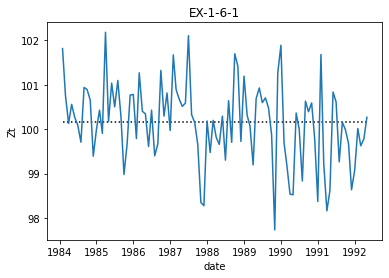

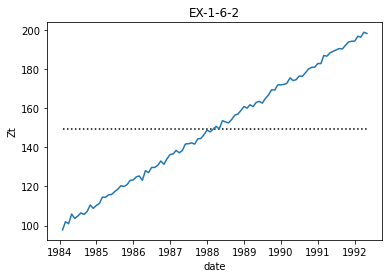

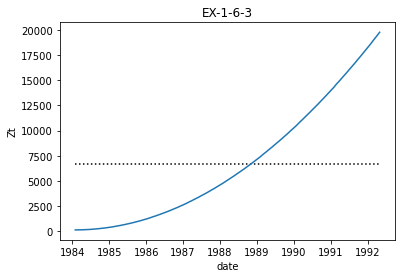

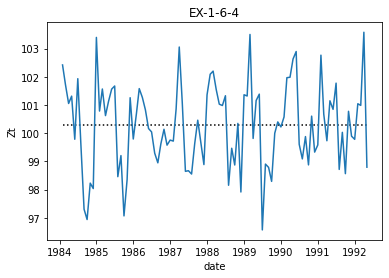

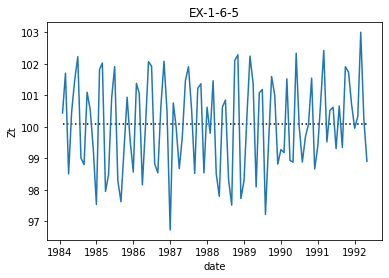

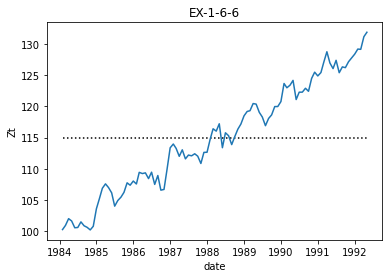

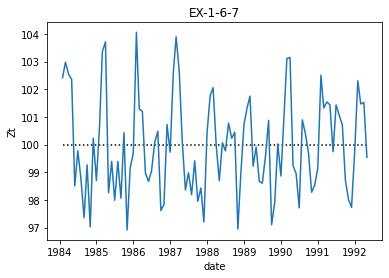

In [10]:
for i in range(1, 8):
    plt.figure()
    plt.plot(z_ts["Z" + str(i)])
    plt.hlines(np.mean(z_ts["Z" + str(i)]), z_ts.index[0], z_ts.index[-1], color='black', ls=":")
    plt.xlabel("date")
    plt.ylabel("Zt")
    plt.title(f"EX-1-6-{i}")
    plt.plot()

[]

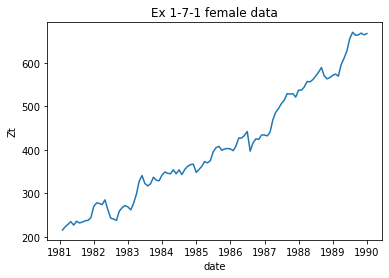

In [11]:
# Ex 1-7-1
z = []

with open('../data/female.txt') as f:
    for line in f.readlines():
        for elem in line.rstrip().split(" "):
            if len(elem):
                z.append(float(elem))
                
z = np.array(z)

z_ts = pd.DataFrame(z,
    index=pd.date_range("1981-01-01", periods=len(z), freq="M"),
    columns=["Zt"]
)

plt.plot(z_ts['Zt'])
plt.xlabel("date")
plt.ylabel("Zt")
plt.title("Ex 1-7-1 female data")
plt.plot()

[]

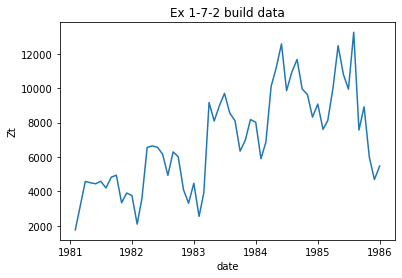

In [12]:
# Ex 1-7-2
z = []

with open('../data/build.txt') as f:
    for line in f.readlines():
        for elem in line.rstrip().split(" "):
            if len(elem):
                z.append(float(elem))
                
z = np.array(z)

z_ts = pd.DataFrame(z,
    index=pd.date_range("1981-01-01", periods=len(z), freq="M"),
    columns=["Zt"]
)

plt.plot(z_ts['Zt'])
plt.xlabel("date")
plt.ylabel("Zt")
plt.title("Ex 1-7-2 build data")
plt.plot()

[]

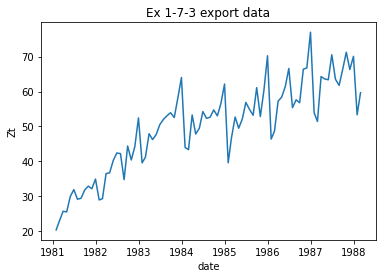

In [13]:
# Ex 1-7-3
z = []

with open('../data/export.txt') as f:
    for line in f.readlines():
        for elem in line.rstrip().split(" "):
            if len(elem):
                z.append(float(elem))
                
z = np.array(z)

z_ts = pd.DataFrame(z,
    index=pd.date_range("1981-01-01", periods=len(z), freq="M"),
    columns=["Zt"]
)

plt.plot(z_ts['Zt'])
plt.xlabel("date")
plt.ylabel("Zt")
plt.title("Ex 1-7-3 export data")
plt.plot()

[]

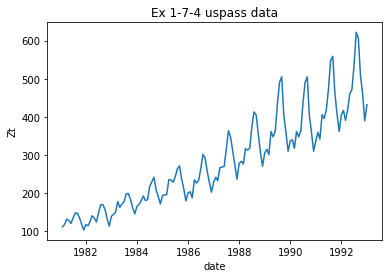

In [14]:
# Ex 1-7-4
z = []

with open('../data/usapass.txt') as f:
    for line in f.readlines():
        for elem in line.rstrip().split(" "):
            if len(elem):
                z.append(float(elem))
                
z = np.array(z)

z_ts = pd.DataFrame(z,
    index=pd.date_range("1981-01-01", periods=len(z), freq="M"),
    columns=["Zt"]
)

plt.plot(z_ts['Zt'])
plt.xlabel("date")
plt.ylabel("Zt")
plt.title("Ex 1-7-4 uspass data")
plt.plot()